In [27]:
import importlib
import plots
importlib.reload(plots)

import statistics

from marketenvironment import MarketEnvironment
from simulation import run_episode
from pprint import pprint

# RL-Environment

In [2]:
sim_env = MarketEnvironment(num_agents=5, costs=5, sigma=2)
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


Varianz oder Standardabweichung der Rewards

In [3]:
inner_dict = round_info[0]
rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]
steps = sorted(round_info.keys())

rewards = {}

for rz in rz_keys:
    rewards = [round_info[s][rz]["actual_reward"] for s in steps]
    mean = statistics.mean(rewards)
    varianz = statistics.variance(rewards)
    stdev = statistics.stdev(rewards)
    print(rz, "Mean", mean, "Standardabweichung", stdev, "Verhältnis", stdev/mean)

RZ1 Mean 3.549 Standardabweichung 3.288423933512194 Verhältnis 0.9265776087664678
RZ2 Mean 3.3844375 Standardabweichung 3.4210810839655106 Verhältnis 1.0108270824813608
RZ3 Mean 3.413875 Standardabweichung 3.415208604990616 Verhältnis 1.0003906425954718
RZ4 Mean 3.3811875 Standardabweichung 3.547285968816416 Verhältnis 1.0491242999142805
RZ5 Mean 3.371875 Standardabweichung 3.381994784216123 Verhältnis 1.0030012335024645


Unterschiede beim Mean Reward liegen bei < 0.07.

Interpretation:
- Kein Agent dominiert langfristig
- Keine systematische Benachteiligung
- Dein Mechanismus ist symmetrisch / fair

Standardabweichung $`\sigma`$ ~ 3.3–3.5

Verglichen mit dem Mittelwert ($`\mu`$~3.45):

$`\frac{\sigma}{\mu}`$~1

=> Die Rewards schwanken stark von Runde zu Runde.

a) Kosten sind zufällig
- Kosten ~ Normal(5, 2), abgeschnitten auf [1, 10]
- Jede Runde komplett neue Realisation
- → Einkommen stark zufallsgetrieben

b) Marktpreis schwankt
- Preis = ⌈Mittelwert der aktuellen Kosten⌉
- → Preis variiert ebenfalls zufällig
- → Earnings = Preis − Kosten ist volatil

c) Wettbewerb & Bieten
- Ob du gewinnst / verlierst ist stochastisch
- Selbst bei gleicher Strategie

Warum Mean positive (~3.4)?

Erwartungswert grob:
- Kostenmittel: 5
- Marktpreis: ≈ 5–6 (ceil des Mittels)
- Earnings ≈ 0–1 pro Job
- Durch Bieten / Marktmechanismus kommt zusätzlicher Gewinn

👉 Der Markt erzeugt systematisch positiven Überschuss für Agenten.

Das bedeutet:
- Das System ist nicht „zero-sum“
- Es gibt positiven social welfare

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

importlib.reload(plots)

<module 'plots' from '/home/niklas/Dokumente/Master/VAS/FederatedComputeCluster/src/plots.py'>

Wie viel Zahlen die Agenten im Schnitt für fremde Aufträge?

Plotting jobs processed on market


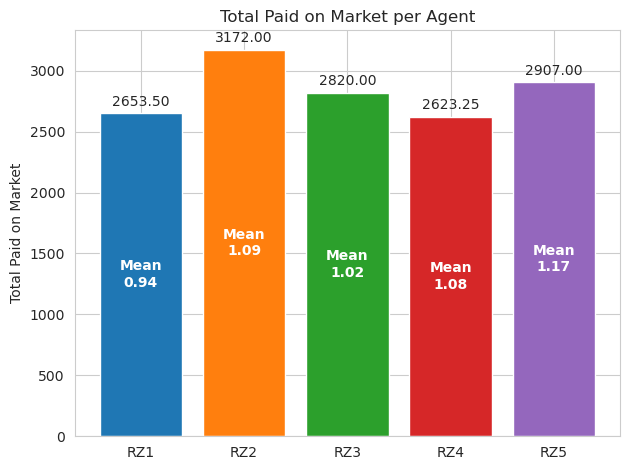

In [65]:
print("Plotting jobs processed on market")
plots.plot_paid_on_market(round_info)

Barplot: Gewinn pro Agent über alle Runden

Plotting Cumulative Rewards


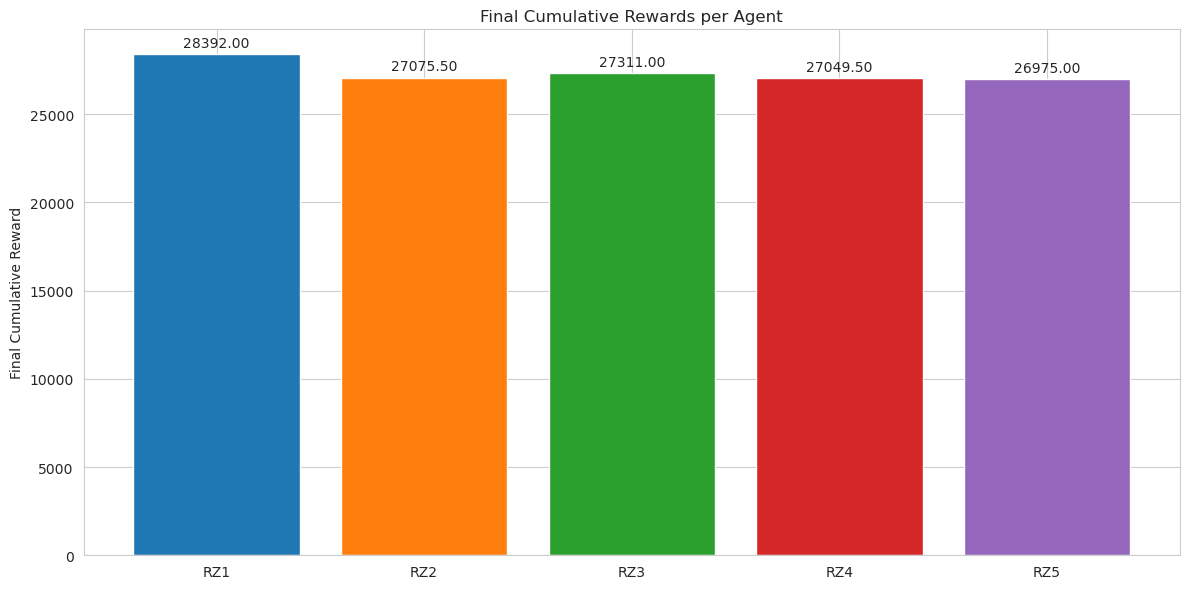

In [35]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Barplot: Anzahl bearbeiteter Aufträge pro Agent

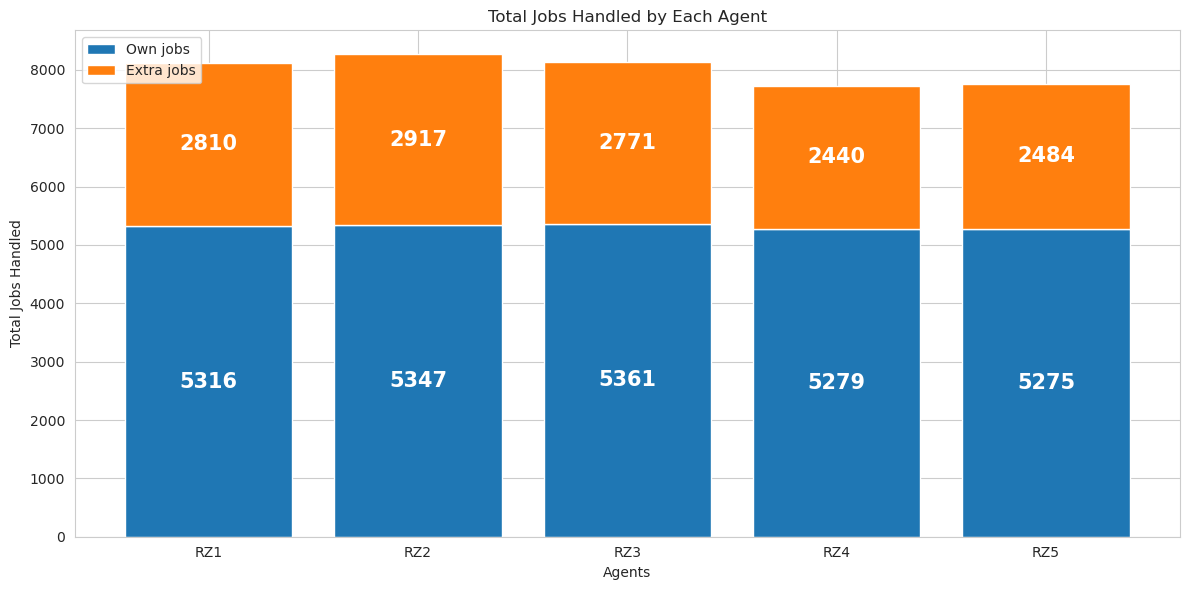

In [52]:
plots.plot_processed_jobs(round_info)

Barplot: Anzahl bearbeiteter fremder Aufträge pro Agent

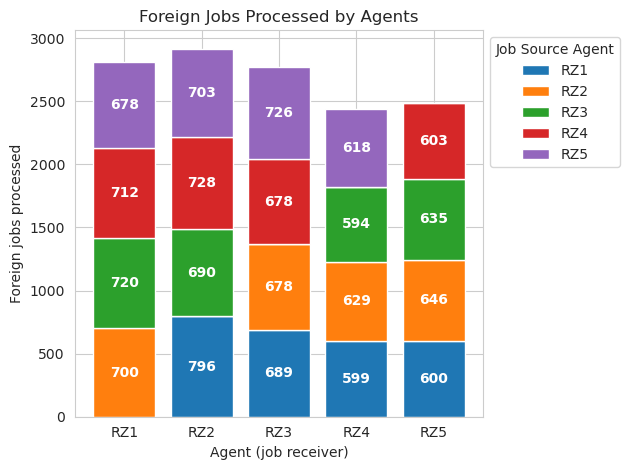

In [60]:
plots.plot_processed_foreign_jobs(round_info)

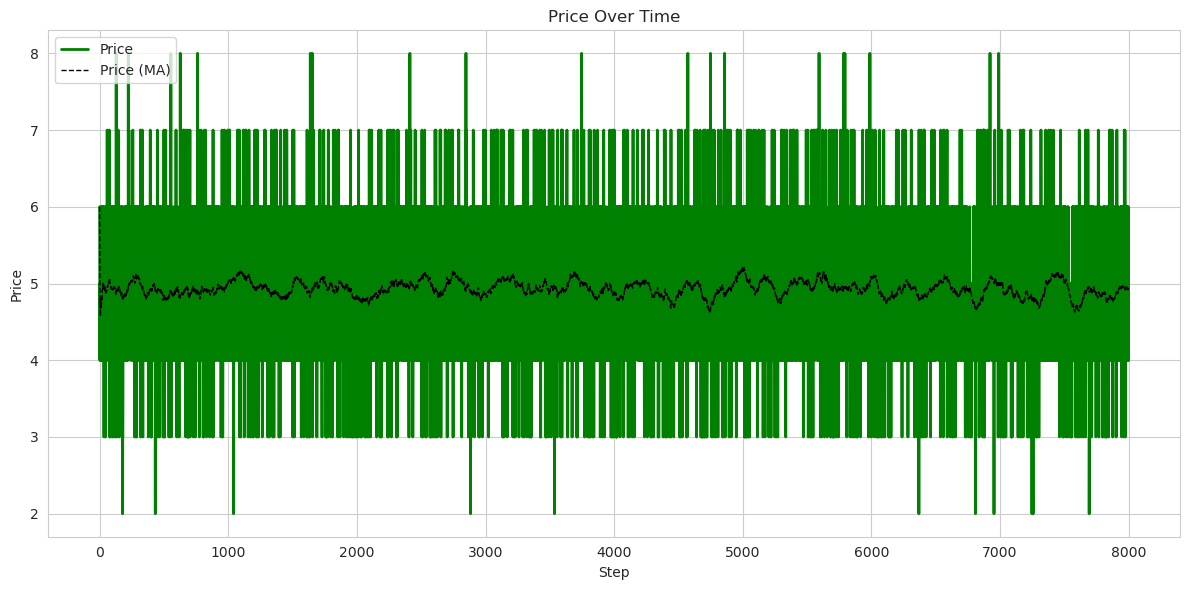

In [8]:
plots.plot_price(round_info)

Plotting Q-Tables
Agent RZ1


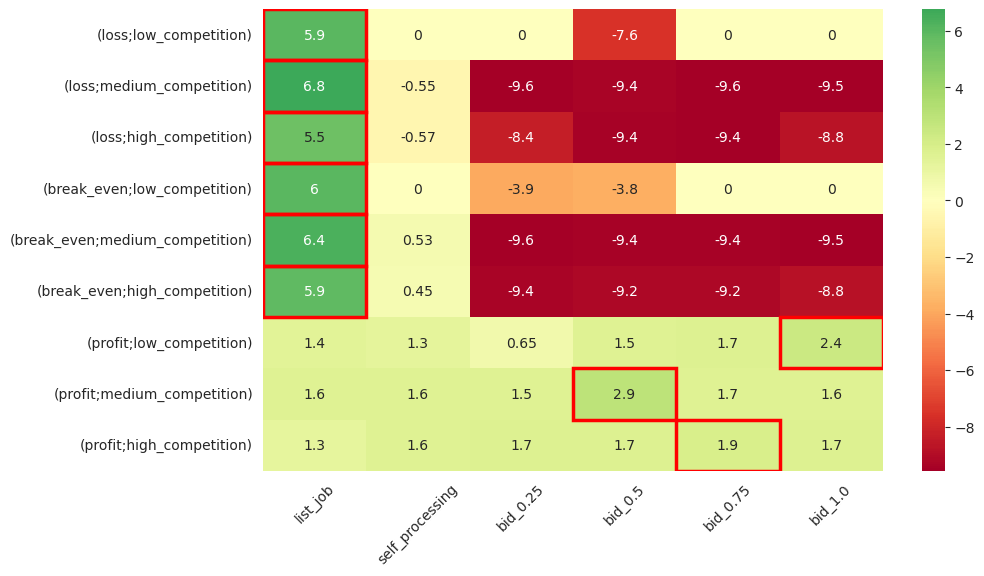

Agent RZ2


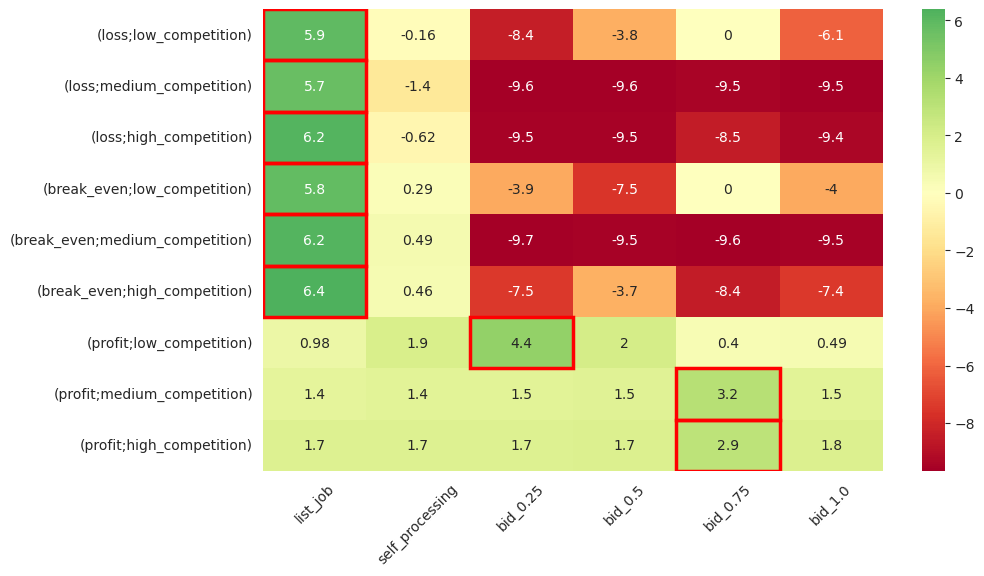

Agent RZ3


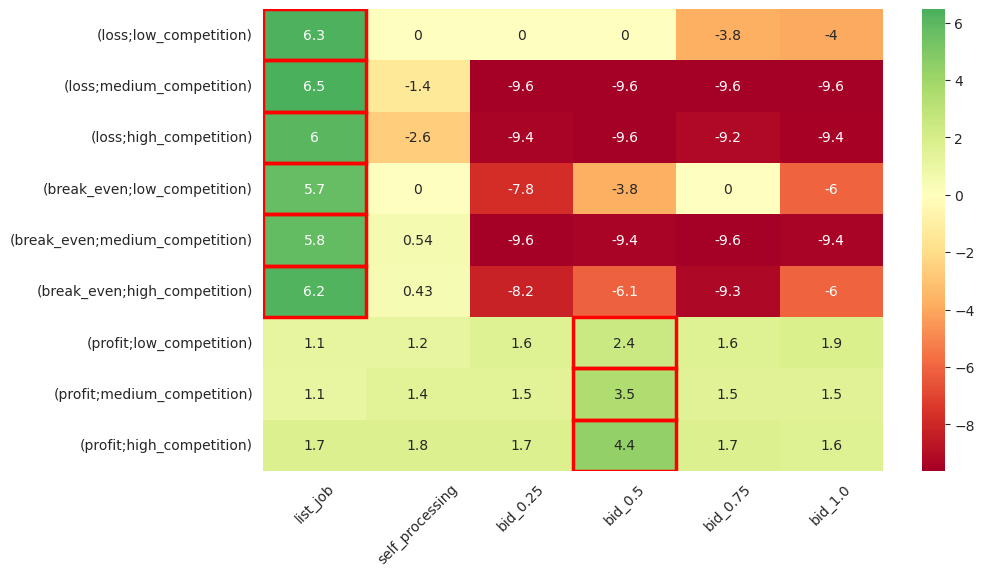

Agent RZ4


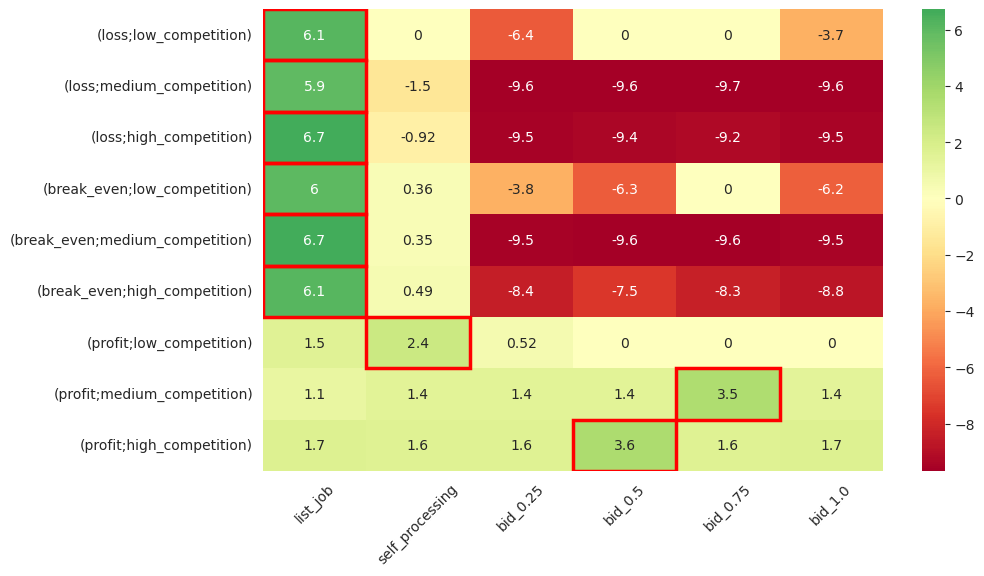

Agent RZ5


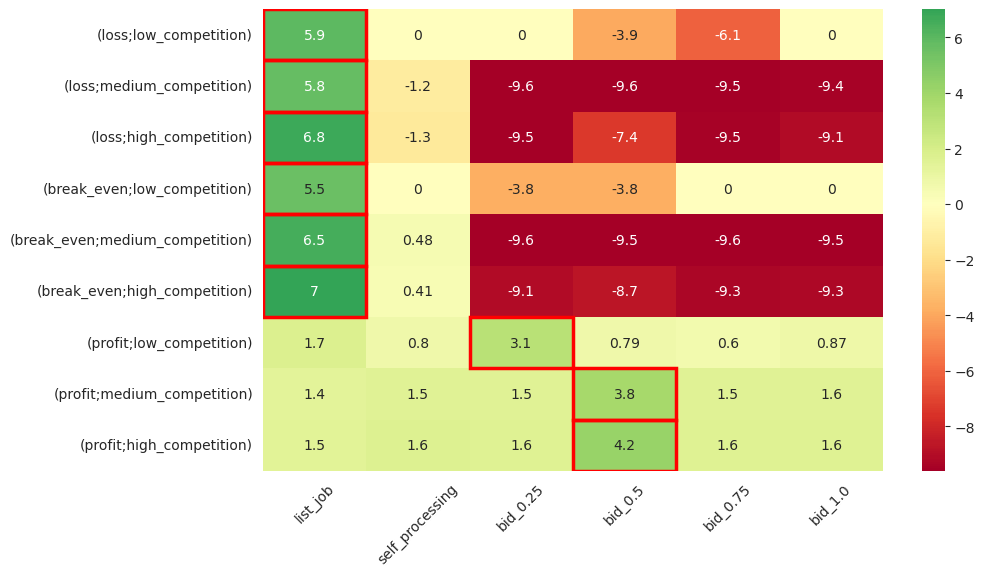

In [9]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name}")
    plots.plot_q_tables(agent)

Plotting Rewards


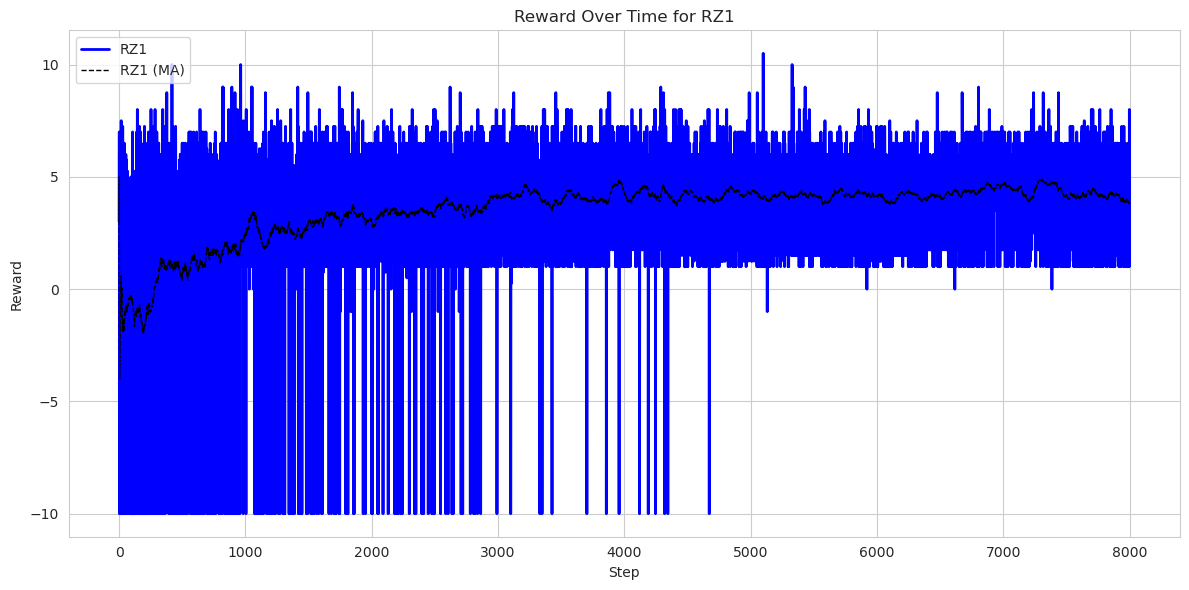

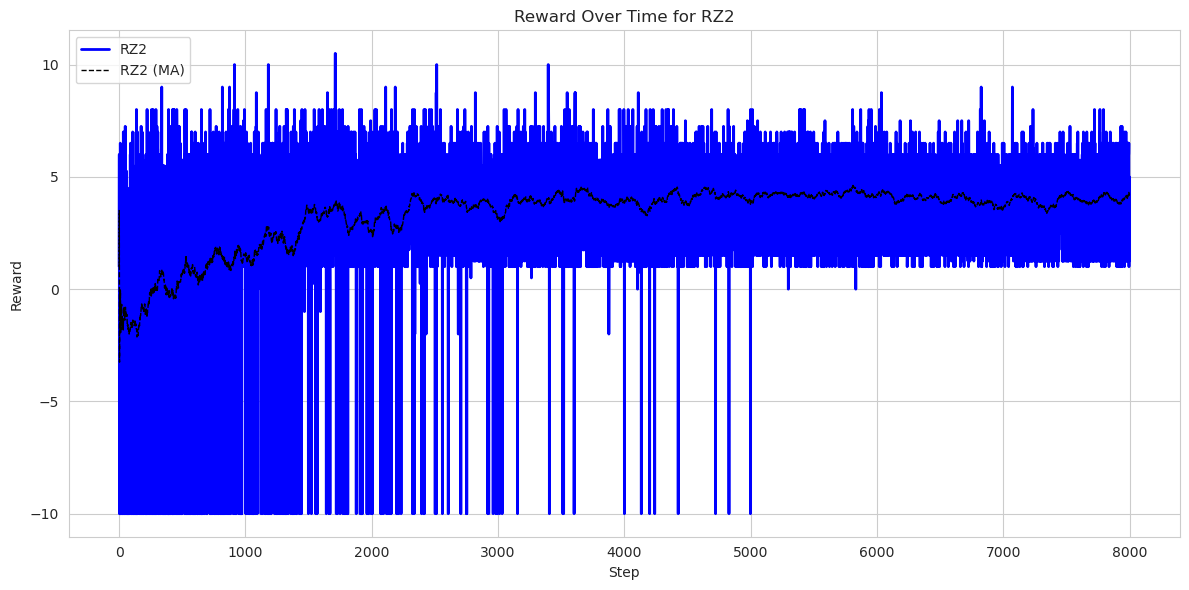

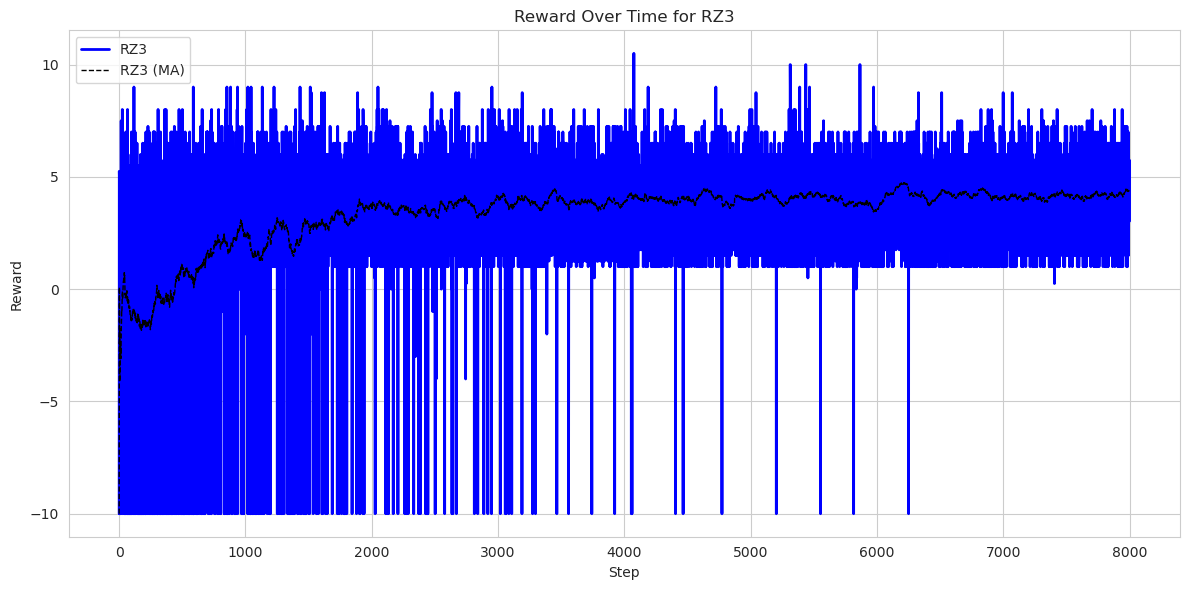

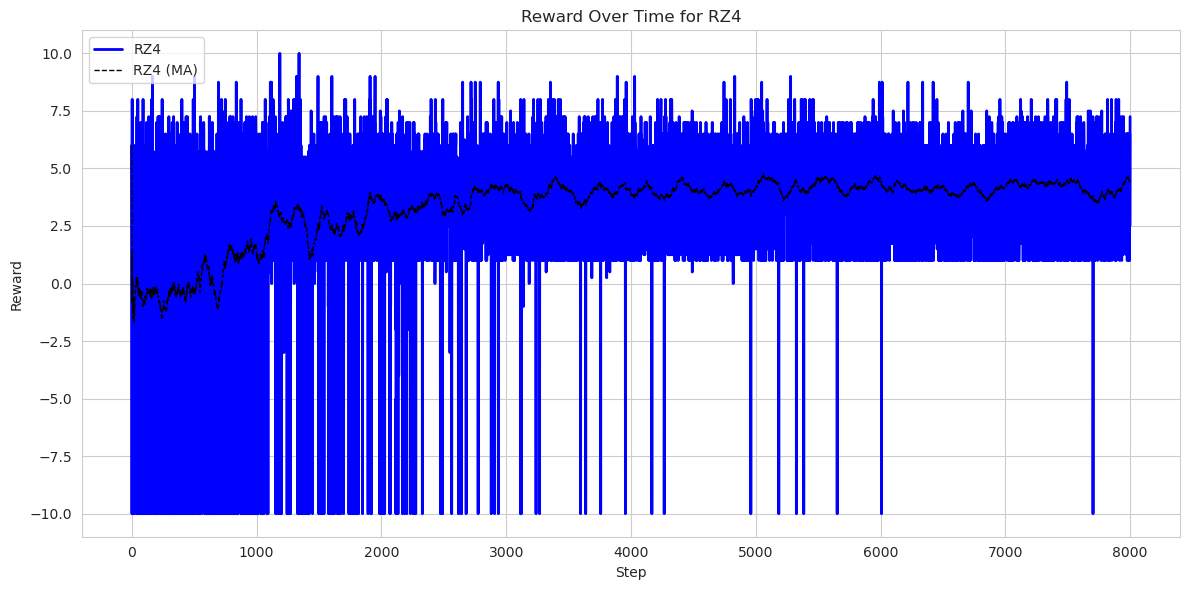

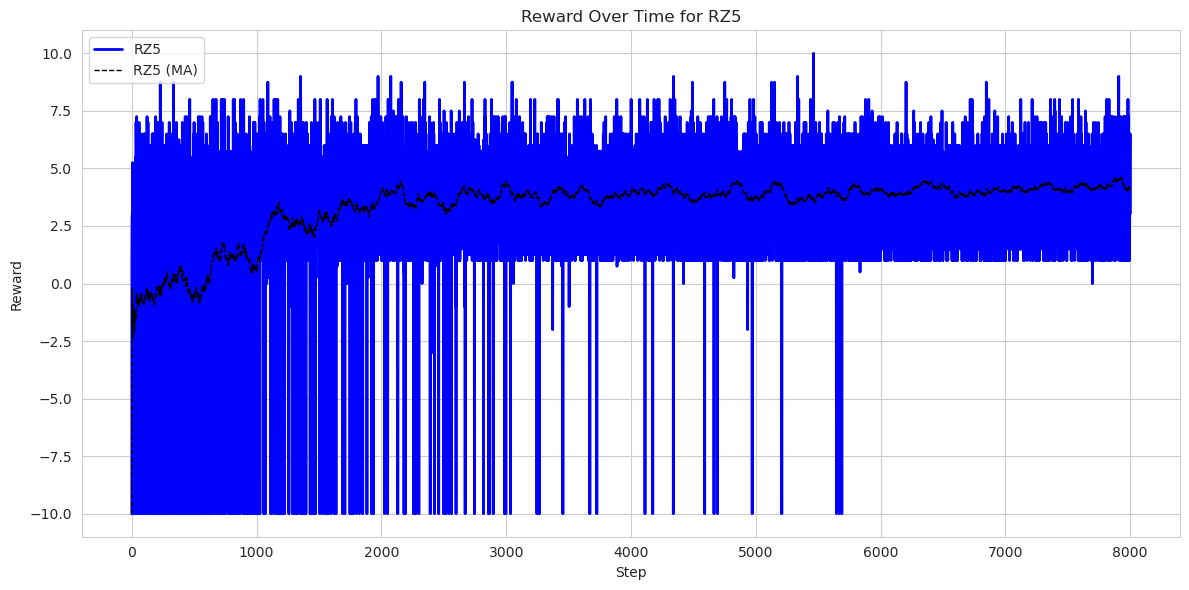

In [10]:
print("Plotting Rewards")
for agent in sim_env.agents.values():
    plots.plot_reward_for(agent.name, round_info)

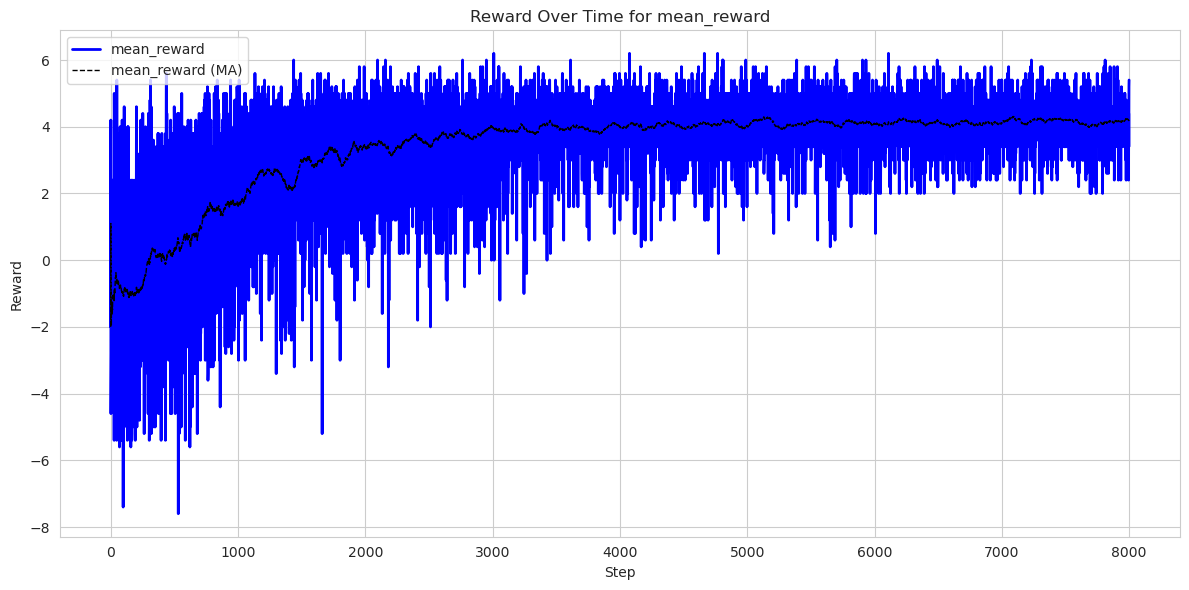

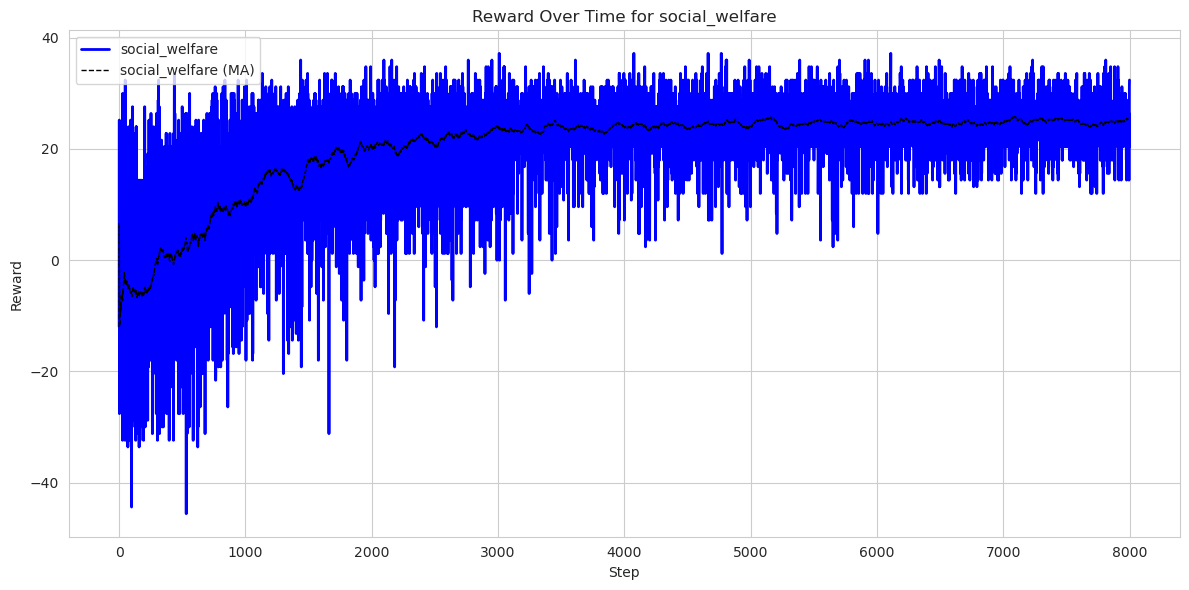

In [11]:
plots.plot_reward_for("mean_reward", round_info)
plots.plot_reward_for("social_welfare", round_info)

Plotting Q-Table Convergance


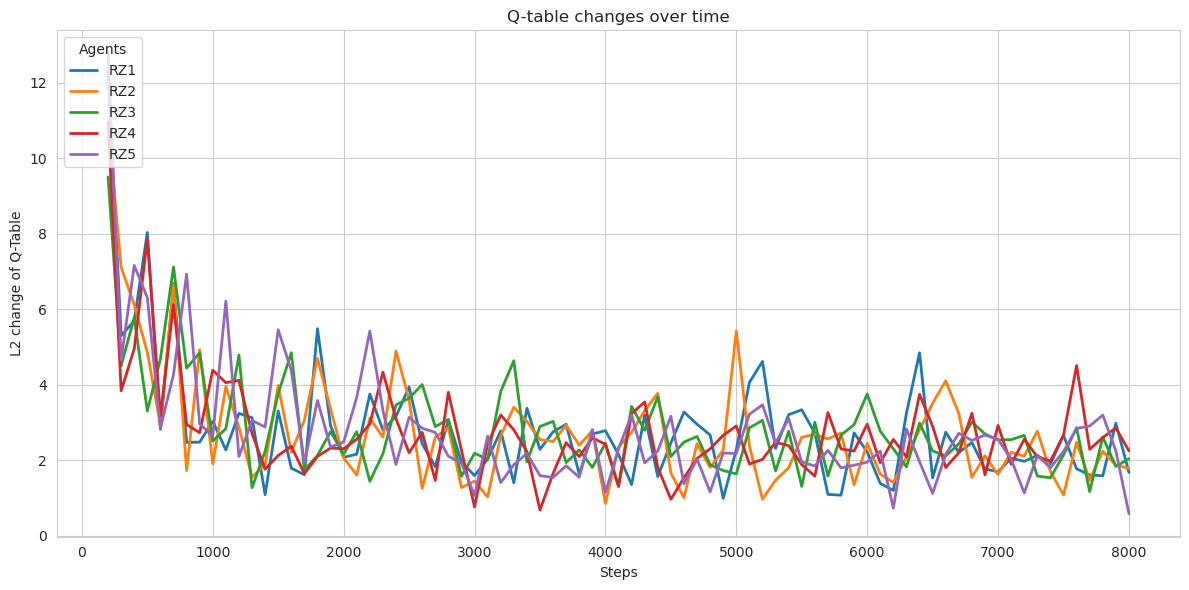

In [66]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)